In [2]:
import pandas as pd
import json
import requests
import base64
import urllib.parse
from plotnine import *
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import geoplot as gplt
from pyproj import CRS
from shapely.geometry import Point
from matplotlib import ticker
from matplotlib.ticker import ScalarFormatter

In [3]:
#start here
df_barca = pd.read_csv('df_idealista_barca.csv')
df_madrid = pd.read_csv('df_idealista_madrid.csv')
df_madrid2 = pd.read_csv('df_idealista_madrid2.csv')
df_valencia = pd.read_csv('df_idealista_valencia.csv')
df_sevilla = pd.read_csv('df_idealista_sevilla.csv')
df_malaga = pd.read_csv('df_idealista_malaga.csv')
df_bilbao = pd.read_csv('df_idealista_bilbao.csv')
df_palma = pd.read_csv('df_idealista_palma.csv')
df_laspalmas = pd.read_csv('df_idealista_laspalmas.csv')
df_zaragoza = pd.read_csv('df_idealista_zaragoza.csv')
df_granada = pd.read_csv('df_idealista_granada.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'df_idealista_barca.csv'

In [141]:
df_madrid_all = pd.concat([df_madrid, df_madrid2], ignore_index=True)

In [142]:
def keep_columns(df):
    columns_to_keep = ['propertyCode', 'thumbnail', 'price', 'propertyType', 'size', 'exterior', 'rooms', 'bathrooms', 'address', 'province', 'municipality', 'district', 'country',
    'latitude', 'longitude', 'showAddress', 'url', 'distance', 'description']
    return df[columns_to_keep]


In [143]:
df_barca_clean = keep_columns(df_barca)
df_madrid_clean = keep_columns(df_madrid_all)
df_valencia_clean = keep_columns(df_valencia)
df_sevilla_clean = keep_columns(df_sevilla)
df_malaga_clean = keep_columns(df_malaga)
df_bilbao_clean = keep_columns(df_bilbao)
df_palma_clean = keep_columns(df_palma)
df_laspalmas_clean = keep_columns(df_laspalmas)
df_zaragoza_clean = keep_columns(df_zaragoza)
df_granada_clean = keep_columns(df_granada)


In [144]:
# function to check for duplicates
def remove_duplicates(df):
    duplicates = df.duplicated()
    # drop duplicates
    df_clean = df.drop_duplicates()
    return df_clean



In [145]:
df_barca_clean = remove_duplicates(df_barca_clean)
df_madrid_clean = remove_duplicates(df_madrid_clean)
df_valencia_clean = remove_duplicates(df_valencia_clean)
df_sevilla_clean = remove_duplicates(df_sevilla_clean)
df_malaga_clean = remove_duplicates(df_malaga_clean)
df_bilbao_clean = remove_duplicates(df_bilbao_clean)
df_palma_clean = remove_duplicates(df_palma_clean)
df_laspalmas_clean = remove_duplicates(df_laspalmas_clean)
df_zaragoza_clean = remove_duplicates(df_zaragoza_clean)
df_granada_clean = remove_duplicates(df_granada_clean)


In [146]:
df_madrid_clean

,propertyCode,thumbnail,price,propertyType,size,exterior,rooms,bathrooms,address,province,municipality,district,country,latitude,longitude,showAddress,url,distance,description
0,463175,https://img3.idealista.com/blur/WEB_LISTING/0/...,3400000.0,chalet,995.0,False,8,7,La Moraleja urbanización,Madrid,La Moraleja,La Moraleja urbanización,es,40.507145,-3.628458,False,https://www.idealista.com/inmueble/463175/,11898,DESALAS. Ref: MOV00825. En la EXCLUSIVA zona s...
1,95331129,https://img3.idealista.com/blur/WEB_LISTING/0/...,2000000.0,chalet,441.0,False,5,5,Julio Caro Baroja,Madrid,La Moraleja,Encinar de los Reyes,es,40.507635,-3.646229,False,https://www.idealista.com/inmueble/95331129/,11214,Suma Moraleja le ofrece este espléndido y lumi...
2,100527915,https://img3.idealista.com/blur/WEB_LISTING/0/...,475000.0,flat,125.0,True,3,2,Calle Castillo de Candanchú,Madrid,Madrid,Fuencarral,es,40.504667,-3.678894,False,https://www.idealista.com/inmueble/100527915/,9997,GILMAR MORALEJA ofrece estupendo PISO EN LAS T...
3,27686133,https://img3.idealista.com/blur/WEB_LISTING/0/...,1480000.0,chalet,180.0,False,3,2,Paseo de los Parques,Madrid,La Moraleja,Encinar de los Reyes,es,40.512497,-3.644872,False,https://www.idealista.com/inmueble/27686133/,11752,REA Inmobiliaria ( ) presenta este pareado imp...
4,100811612,https://img3.idealista.com/blur/WEB_LISTING/0/...,3600000.0,chalet,600.0,False,6,6,HOYARRASA,Madrid,La Moraleja,La Moraleja urbanización,es,40.526995,-3.619781,False,https://www.idealista.com/inmueble/100811612/,14166,REA Inmobiliaria (916508937) ofrece este fantá...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3045,101336238,https://img3.idealista.com/blur/WEB_LISTING/0/...,180000.0,flat,110.0,True,3,2,Calle Campotéjar,Madrid,Madrid,Usera,es,40.369720,-3.704518,False,https://www.idealista.com/inmueble/101336238/,5232,"This flat is at Calle Campotéjar, 28041, Madri..."
3046,101337983,https://img3.idealista.com/blur/WEB_LISTING/0/...,125000.0,flat,70.0,True,3,1,Avenida de los Ángeles,Madrid,Getafe,Juan de la Cierva,es,40.307727,-3.714804,False,https://www.idealista.com/inmueble/101337983/,12160,Madridsur Gestión Inmobiliaria sells an apartm...
3047,101068284,https://img3.idealista.com/blur/WEB_LISTING/0/...,4750000.0,flat,487.0,True,4,5,subdistrict Recoletos,Madrid,Madrid,Barrio de Salamanca,es,40.429078,-3.683692,False,https://www.idealista.com/inmueble/101068284/,2182,PROMORA MADRID is selling this magnificent fla...
3048,97499694,https://img3.idealista.com/blur/WEB_LISTING/0/...,150500.0,flat,107.0,True,2,1,subdistrict Palomeras sureste,Madrid,Madrid,Puente de Vallecas,es,40.389031,-3.639172,False,https://www.idealista.com/inmueble/97499694/,6280,MADRID VALLECAS real estate agency | PALOMERAS...


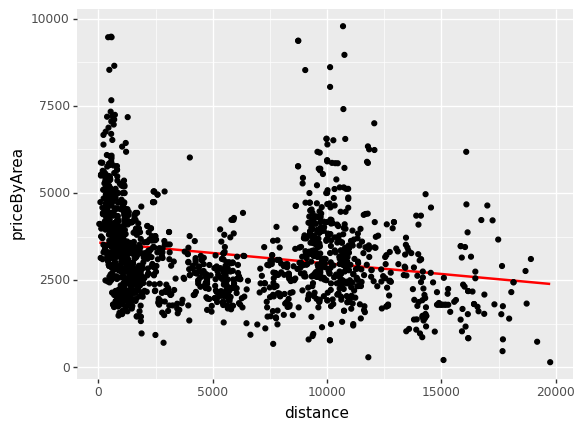

<ggplot: (8775203953544)>

In [147]:
ggplot(df_bilbao, aes (x = 'distance', y = 'priceByArea')) + stat_smooth (method = 'lm', se = False, color ='red') + geom_point()


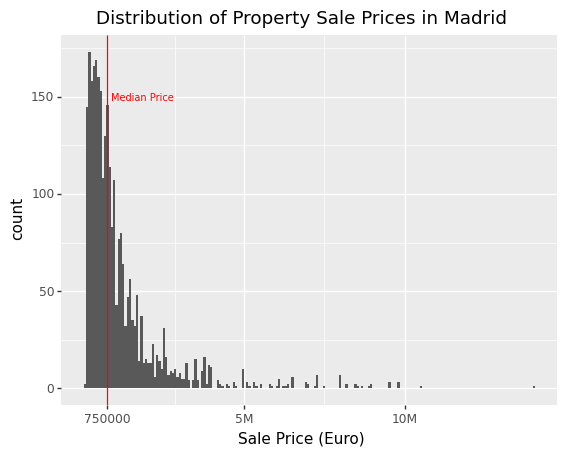

<ggplot: (8775192741864)>

In [148]:
median_price = np.median(df_madrid_clean['price'])
median_price = int(median_price)

madrid_price_graph = (ggplot(df_madrid_clean, aes(x='price')) + 
  geom_histogram(bins=30, binwidth=70000) 
  + geom_vline(xintercept=median_price, colour= ['red']) 
  + scale_x_continuous(breaks=[median_price, 5000000, 10000000], labels=[median_price, '5M', '10M']) 
  + xlab('Sale Price (Euro)')
  + ggtitle('Distribution of Property Sale Prices in Madrid') 
  + annotate("text", x=median_price+1100000, y=150, label="Median Price", color="red", size=7, angle=0))

madrid_price_graph

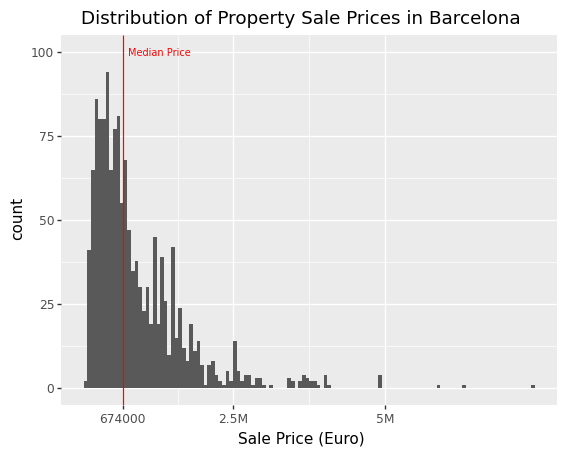

<ggplot: (8775203489374)>

In [150]:
median_price = np.median(df_barca_clean['price'])
median_price = int(median_price)

barca_price_graph = (ggplot(df_barca_clean, aes(x='price')) + 
  geom_histogram(bins=30, binwidth= 60000) 
  + geom_vline(xintercept=median_price, colour= ['red']) 
  + scale_x_continuous(breaks=[median_price, 2500000, 5000000], labels=[median_price, '2.5M', '5M']) 
  + xlab('Sale Price (Euro)')
  + ggtitle('Distribution of Property Sale Prices in Barcelona') 
  + annotate("text", x = median_price + 600000, y=100, label="Median Price", color="red", size=7, angle=0))

barca_price_graph

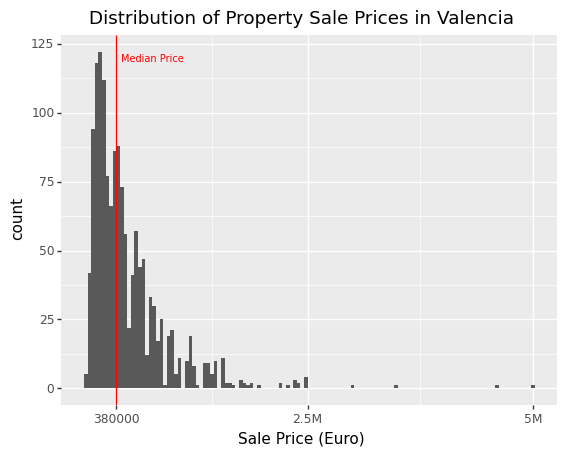

<ggplot: (8775191830010)>

In [153]:
median_price = np.median(df_valencia_clean['price'])
median_price = int(median_price)

valencia_price_graph = (ggplot(df_valencia_clean, aes(x='price')) + 
  geom_histogram(bins=30, binwidth= 40000) 
  + geom_vline(xintercept=median_price, colour= ['red']) 
  + scale_x_continuous(breaks=[median_price, 2500000, 5000000], labels=[median_price, '2.5M', '5M']) 
  + xlab('Sale Price (Euro)')
  + ggtitle('Distribution of Property Sale Prices in Valencia') 
  + annotate("text", x = median_price + 400000, y=120, label="Median Price", color="red", size=7, angle=0))

valencia_price_graph

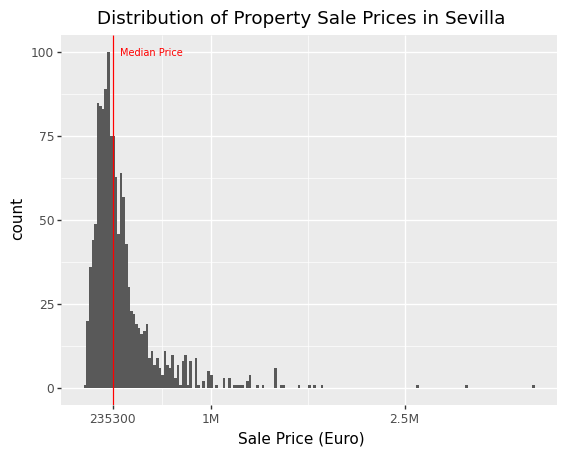

<ggplot: (8775193015860)>

In [155]:
median_price = np.median(df_sevilla_clean['price'])
median_price = int(median_price)

sevilla_price_graph = (ggplot(df_sevilla_clean, aes(x='price')) + 
  geom_histogram(bins=30, binwidth= 20000) 
  + geom_vline(xintercept=median_price, colour= ['red']) 
  + scale_x_continuous(breaks=[median_price, 1000000, 2500000], labels=[median_price, '1M', '2.5M']) 
  + xlab('Sale Price (Euro)')
  + ggtitle('Distribution of Property Sale Prices in Sevilla') 
  + annotate("text", x = median_price + 300000, y=100, label="Median Price", color="red", size=7, angle=0))

sevilla_price_graph

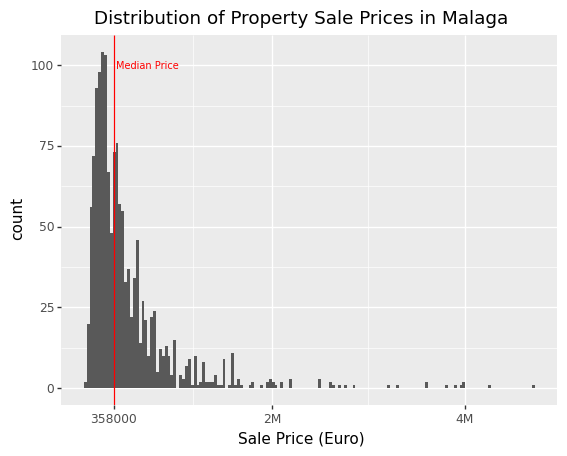

<ggplot: (8775191042280)>

In [165]:
median_price = np.median(df_malaga_clean['price'])
median_price = int(median_price)

malaga_price_graph = (ggplot(df_malaga_clean, aes(x='price')) + 
  geom_histogram(bins=30, binwidth= 30000) 
  + geom_vline(xintercept=median_price, colour= ['red']) 
  + scale_x_continuous(breaks=[median_price, 2000000, 4000000], labels=[median_price, '2M', '4M']) 
  + xlab('Sale Price (Euro)')
  + ggtitle('Distribution of Property Sale Prices in Malaga') 
  + annotate("text", x = median_price + 350000, y=100, label="Median Price", color="red", size=7, angle=0))

malaga_price_graph

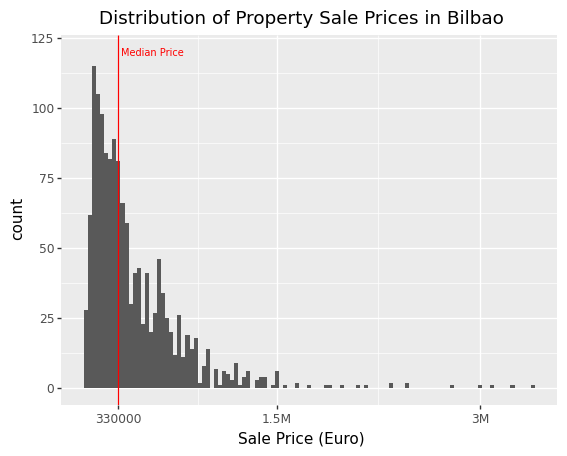

<ggplot: (8775191350242)>

In [158]:
median_price = np.median(df_bilbao_clean['price'])
median_price = int(median_price)

bilbao_price_graph = (ggplot(df_bilbao_clean, aes(x='price')) + 
  geom_histogram(bins=30, binwidth= 30000) 
  + geom_vline(xintercept=median_price, colour= ['red']) 
  + scale_x_continuous(breaks=[median_price, 1500000, 3000000], labels=[median_price, '1.5M', '3M']) 
  + xlab('Sale Price (Euro)')
  + ggtitle('Distribution of Property Sale Prices in Bilbao') 
  + annotate("text", x = median_price + 250000, y=120, label="Median Price", color="red", size=7, angle=0))

bilbao_price_graph

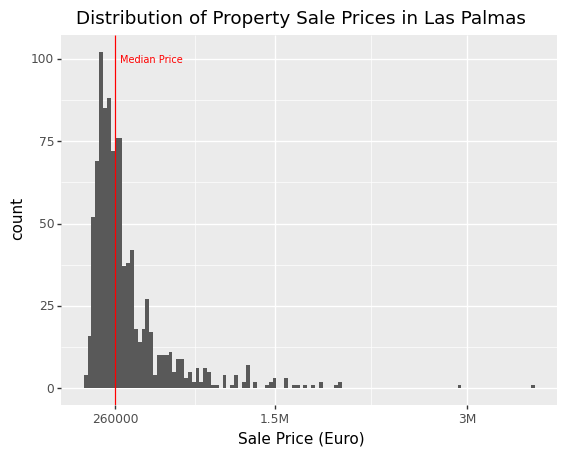

<ggplot: (8775190970465)>

In [166]:
median_price = np.median(df_laspalmas_clean['price'])
median_price = int(median_price)

laspalmas_price_graph = (ggplot(df_laspalmas_clean, aes(x='price')) + 
  geom_histogram(bins=30, binwidth= 30000) 
  + geom_vline(xintercept=median_price, colour= ['red']) 
  + scale_x_continuous(breaks=[median_price, 1500000, 3000000], labels=[median_price, '1.5M', '3M']) 
  + xlab('Sale Price (Euro)')
  + ggtitle('Distribution of Property Sale Prices in Las Palmas') 
  + annotate("text", x = median_price + 280000, y=100, label="Median Price", color="red", size=7, angle=0))

laspalmas_price_graph

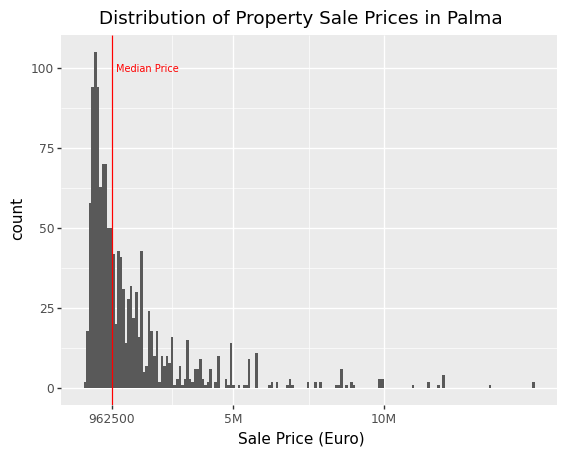

<ggplot: (8775190939251)>

In [168]:
median_price = np.median(df_palma_clean['price'])
median_price = int(median_price)

palma_price_graph = (ggplot(df_palma_clean, aes(x='price')) + 
  geom_histogram(bins=30, binwidth= 85000) 
  + geom_vline(xintercept=median_price, colour= ['red']) 
  + scale_x_continuous(breaks=[median_price, 5000000, 10000000], labels=[median_price, '5M', '10M']) 
  + xlab('Sale Price (Euro)')
  + ggtitle('Distribution of Property Sale Prices in Palma') 
  + annotate("text", x = median_price + 1200000, y=100, label="Median Price", color="red", size=7, angle=0))

palma_price_graph

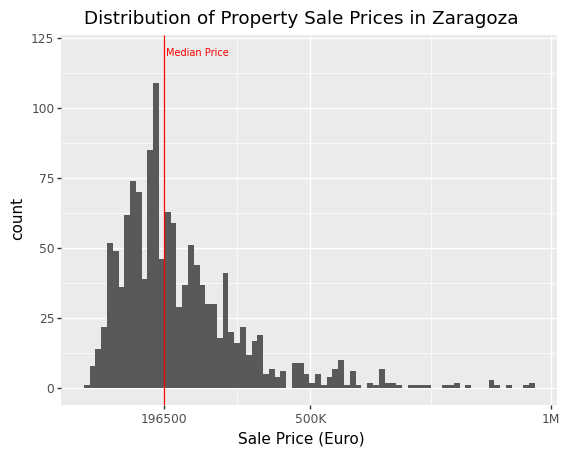

<ggplot: (8775193017025)>

In [174]:
median_price = np.median(df_zaragoza_clean['price'])
median_price = int(median_price)

zaragoza_price_graph = (ggplot(df_zaragoza_clean, aes(x='price')) + 
  geom_histogram(bins=30, binwidth= 12000) 
  + geom_vline(xintercept=median_price, colour= ['red']) 
  + scale_x_continuous(breaks=[median_price, 500000, 1000000], labels=[median_price, '500K', '1M']) 
  + xlab('Sale Price (Euro)')
  + ggtitle('Distribution of Property Sale Prices in Zaragoza') 
  + annotate("text", x = median_price + 70000, y=120, label="Median Price", color="red", size=7, angle=0))

zaragoza_price_graph

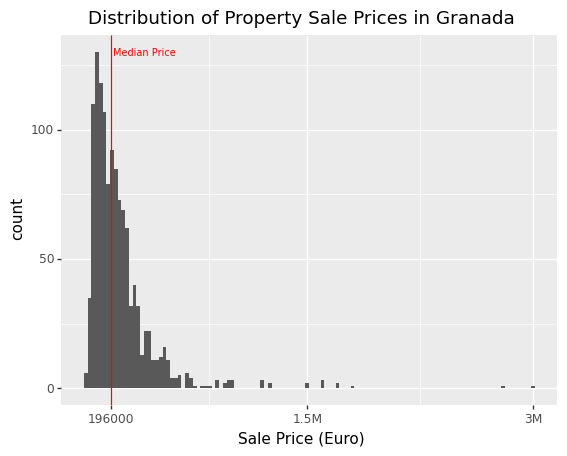

<ggplot: (8775192747927)>

In [177]:
median_price = np.median(df_granada_clean['price'])
median_price = int(median_price)

granada_price_graph = (ggplot(df_granada_clean, aes(x='price')) + 
  geom_histogram(bins=30, binwidth= 25000) 
  + geom_vline(xintercept=median_price, colour= ['red']) 
  + scale_x_continuous(breaks=[median_price, 1500000, 3000000], labels=[median_price, '1.5M', '3M']) 
  + xlab('Sale Price (Euro)')
  + ggtitle('Distribution of Property Sale Prices in Granada') 
  + annotate("text", x = median_price + 220000, y= 130, label="Median Price", color="red", size=7, angle=0))

granada_price_graph

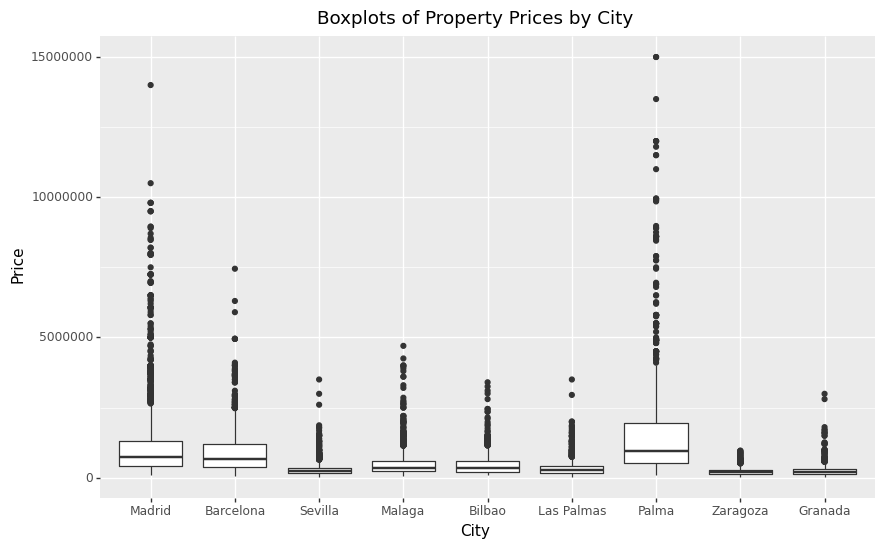

<ggplot: (8775194177958)>

In [178]:
# create list of dataframes
dfs = [df_madrid_clean, df_barca_clean, df_sevilla_clean, df_malaga_clean, df_bilbao_clean, df_laspalmas_clean, df_palma_clean, df_zaragoza_clean, df_granada_clean]

# create a list of city names in the same order as the dataframes
city_names = ['Madrid', 'Barcelona', 'Sevilla', 'Malaga', 'Bilbao', 'Las Palmas', 'Palma', 'Zaragoza', 'Granada']

# create a new column in each dataframe to identify the city
for i in range(len(dfs)):
    dfs[i] = dfs[i].copy()
    dfs[i]['city'] = city_names[i]

# concatenate the dataframes into one
df = pd.concat(dfs)

# convert the 'city' column to a categorical data type with the specified order of categories
df['city'] = pd.Categorical(df['city'], categories=city_names, ordered=True)

# create the plot
(ggplot(df, aes(x='city', y='price')) 
 + geom_boxplot()
 + labs(x='City', y='Price')
 + ggtitle('Boxplots of Property Prices by City')
 + theme(figure_size=(10, 6))  # set figure size
)


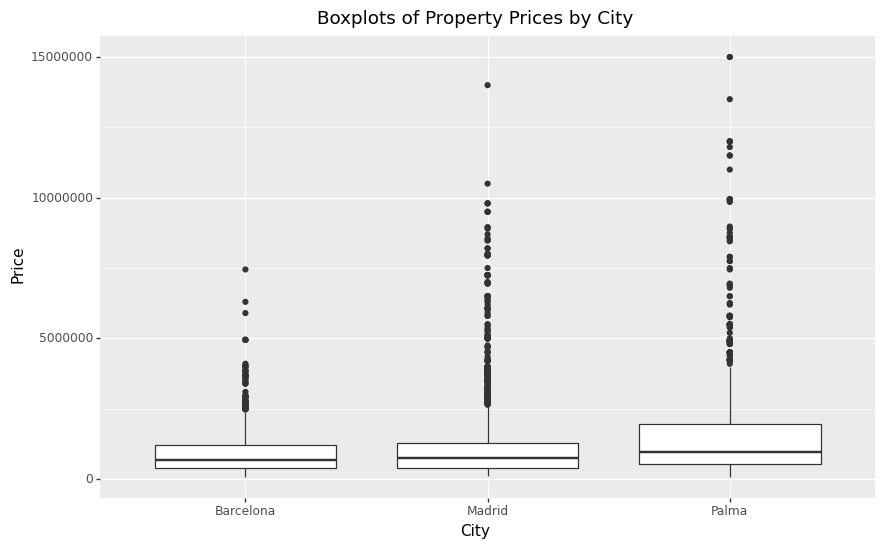

<ggplot: (8775193322448)>

In [179]:
# create list of dataframes
dfs = [df_madrid_clean, df_barca_clean, df_palma_clean]

# create a list of city names in the same order as the dataframes
city_names = ['Madrid', 'Barcelona', 'Palma']

# create a new column in each dataframe to identify the city
for i in range(len(dfs)):
    dfs[i] = dfs[i].copy()
    dfs[i]['city'] = city_names[i]

# concatenate the dataframes into one
df = pd.concat(dfs)

# create the plot
(ggplot(df, aes(x='city', y='price')) 
 + geom_boxplot()
 + labs(x='City', y='Price')
 + ggtitle('Boxplots of Property Prices by City')
 + theme(figure_size=(10, 6))  # set figure size
)

In [1]:
# create list of dataframes
dfs = [df_sevilla_clean, df_malaga_clean, df_bilbao_clean, df_laspalmas_clean, df_zaragoza_clean, df_granada_clean]

# create a list of city names in the same order as the dataframes
city_names = ['Sevilla', 'Malaga', 'Bilbao', 'Las Palmas', 'Zaragoza', 'Granada']

# create a new column in each dataframe to identify the city
for i in range(len(dfs)):
    dfs[i] = dfs[i].copy()
    dfs[i]['city'] = city_names[i]

# concatenate the dataframes into one
df = pd.concat(dfs)

# create the plot
(ggplot(df, aes(x='city', y='price')) 
 + geom_boxplot()
 + labs(x='City', y='Price')
 + ggtitle('Boxplots of Property Prices by City')
 + theme(figure_size=(10, 6))  # set figure size
)



NameError: name 'df_sevilla_clean' is not defined

### MAPPING ###

In [183]:
madrid_map = gpd.read_file('Distritos_20210712.shp', crs='epsg:25830')
barca_map = gpd.read_file('shapefile_distrito_barcelona.shp', crs='epsg:25830') #idk if the crs here is correct
sevilla_map = gpd.read_file('Termino_Municipal.shp', crs='epsg:25830')


In [221]:
type(madrid_map)

geopandas.geodataframe.GeoDataFrame

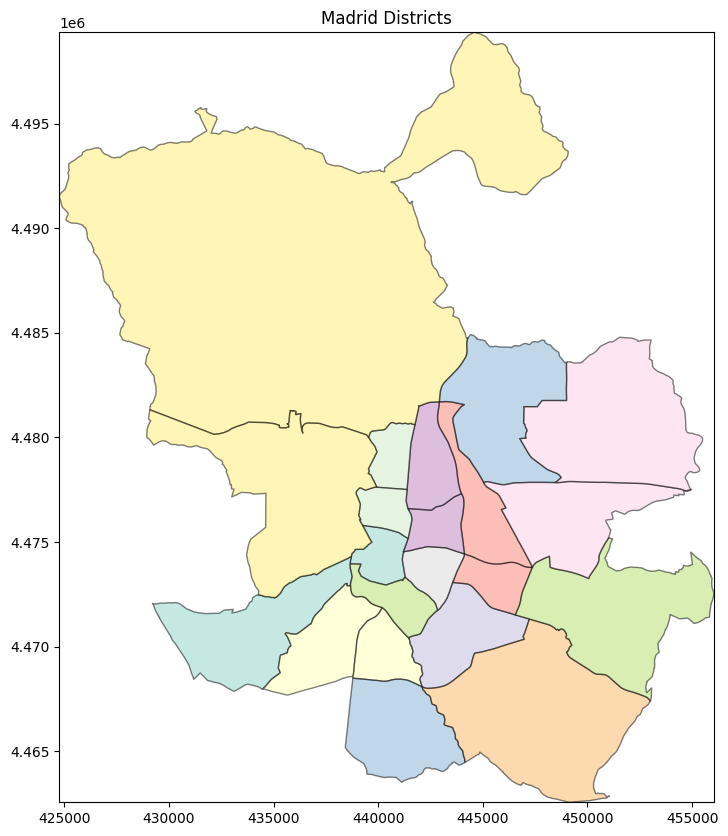

In [185]:
# Test code to recolour Madrid polygons
fig0, ax = plt.subplots(figsize=(10, 10))

# Use the 'geometry' column to color the polygons
madrid_map.plot(ax=ax, column='geometry', cmap='Set3', alpha=0.5, edgecolor='k')

# Set the axis limits and title
ax.set_xlim(madrid_map.total_bounds[0], madrid_map.total_bounds[2])
ax.set_ylim(madrid_map.total_bounds[1], madrid_map.total_bounds[3])
ax.set_title('Madrid Districts')

fig0

In [186]:
# Convert the Pandas DataFrame to a GeoDataFrame using the coordinates as the geometry. Only run this code once.
gdf_prices = gpd.GeoDataFrame(df_madrid_clean, geometry=gpd.points_from_xy(df_madrid_clean.longitude, df_madrid_clean.latitude))
gdf_geometry = gdf_prices['geometry']
gdf_geometry.crs = CRS.from_epsg(4326)
gdf_madrid_properties = gdf_geometry.to_frame()
gdf_madrid_properties

,geometry
0,POINT (-3.62846 40.50714)
1,POINT (-3.64623 40.50763)
2,POINT (-3.67889 40.50467)
3,POINT (-3.64487 40.51250)
4,POINT (-3.61978 40.52700)
...,...
3045,POINT (-3.70452 40.36972)
3046,POINT (-3.71480 40.30773)
3047,POINT (-3.68369 40.42908)
3048,POINT (-3.63917 40.38903)


In [187]:
gdf_madrid_properties

,geometry
0,POINT (-3.62846 40.50714)
1,POINT (-3.64623 40.50763)
2,POINT (-3.67889 40.50467)
3,POINT (-3.64487 40.51250)
4,POINT (-3.61978 40.52700)
...,...
3045,POINT (-3.70452 40.36972)
3046,POINT (-3.71480 40.30773)
3047,POINT (-3.68369 40.42908)
3048,POINT (-3.63917 40.38903)


In [188]:
# Set CRS to ETRS89
madrid_map.crs = CRS.from_epsg(25830)
# Transform to EPSG 4326
madrid_map = madrid_map.to_crs(epsg=4326)
# Check the result
print(madrid_map.crs)
print(gdf_madrid_properties.crs)

EPSG:4326
EPSG:4326


In [189]:
# Perform spatial join
gdf_madrid = gpd.sjoin(gdf_madrid_properties, madrid_map, op='intersects')
gdf_madrid


/home/winterolller/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3382: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.


,geometry,index_right
0,POINT (-3.62846 40.50714),7
1,POINT (-3.64623 40.50763),7
5,POINT (-3.64605 40.50731),7
17,POINT (-3.63636 40.50416),7
26,POINT (-3.61716 40.51029),7
...,...,...
2821,POINT (-3.66587 40.39181),4
2833,POINT (-3.65396 40.39265),4
2913,POINT (-3.66706 40.39522),4
2920,POINT (-3.66552 40.39794),4


In [190]:
gdf_madrid

,geometry,index_right
0,POINT (-3.62846 40.50714),7
1,POINT (-3.64623 40.50763),7
5,POINT (-3.64605 40.50731),7
17,POINT (-3.63636 40.50416),7
26,POINT (-3.61716 40.51029),7
...,...,...
2821,POINT (-3.66587 40.39181),4
2833,POINT (-3.65396 40.39265),4
2913,POINT (-3.66706 40.39522),4
2920,POINT (-3.66552 40.39794),4


In [208]:
gdf_madrid

,geometry,index_right
0,POINT (-3.62846 40.50714),7
1,POINT (-3.64623 40.50763),7
5,POINT (-3.64605 40.50731),7
17,POINT (-3.63636 40.50416),7
26,POINT (-3.61716 40.51029),7
...,...,...
2821,POINT (-3.66587 40.39181),4
2833,POINT (-3.65396 40.39265),4
2913,POINT (-3.66706 40.39522),4
2920,POINT (-3.66552 40.39794),4


In [211]:


gdf_madrid['price'] = df_madrid_clean['price']
gdf_madrid['district'] = df_madrid_clean['district']
gdf_madrid2 = gdf_madrid
gdf_madrid2


,geometry,index_right,price,district
0,POINT (-3.62846 40.50714),7,3400000.0,La Moraleja urbanización
1,POINT (-3.64623 40.50763),7,2000000.0,Encinar de los Reyes
5,POINT (-3.64605 40.50731),7,2000000.0,Encinar de los Reyes
17,POINT (-3.63636 40.50416),7,1680000.0,Encinar de los Reyes
26,POINT (-3.61716 40.51029),7,7250000.0,La Moraleja urbanización
...,...,...,...,...
2821,POINT (-3.66587 40.39181),4,212900.0,Puente de Vallecas
2833,POINT (-3.65396 40.39265),4,140000.0,Puente de Vallecas
2913,POINT (-3.66706 40.39522),4,130000.0,Puente de Vallecas
2920,POINT (-3.66552 40.39794),4,128000.0,Puente de Vallecas


In [212]:
unique_districts = gdf_madrid2['district'].unique()
print(unique_districts)


['La Moraleja urbanización' 'Encinar de los Reyes' 'Hortaleza'
 'Ciudad Lineal' 'San Blas' 'Fuencarral' 'Moncloa' 'Tetuán' 'Chamberí'
 'Centro' 'Barrio de Salamanca' 'Retiro' 'Chamartín' 'Arganzuela'
 'Carabanchel' 'Latina' 'Moratalaz' 'Zona Estación' 'Somosaguas' 'Usera'
 'Barajas' 'Campodón - Ventorro del Cano' 'Vicálvaro' 'Villaverde'
 'Villa de Vallecas' 'Puente de Vallecas']


In [213]:
# List of 21 districts in Madrid
madrid_districts = ['Arganzuela', 'Barajas', 'Carabanchel', 'Centro', 'Chamartín', 'Chamberí', 'Ciudad Lineal', 'Fuencarral-El Pardo', 'Hortaleza', 'Latina', 'Moncloa-Aravaca', 'Moratalaz', 'Puente de Vallecas', 'Retiro', 'Salamanca', 'San Blas-Canillejas', 'Tetuán', 'Usera', 'Vicálvaro', 'Villa de Vallecas', 'Villaverde']

# List of 25 districts obtained from the data
all_districts = gdf_madrid2['district'].unique()

# Find the impostor districts
impostor_districts = set(all_districts) - set(madrid_districts)

# Print the impostor districts
print(impostor_districts)


{'Moncloa', 'Campodón - Ventorro del Cano', 'La Moraleja urbanización', 'San Blas', 'Somosaguas', 'Zona Estación', 'Fuencarral', 'Barrio de Salamanca', 'Encinar de los Reyes'}


In [217]:
avg_price_by_polygon = gdf_madrid2.groupby('index_right')['price'].mean()
avg_price_by_polygon

index_right
0     7.428495e+05
1     2.303677e+05
2     2.571495e+05
3     2.584047e+05
4     1.908333e+05
5     4.244375e+05
6     5.295188e+05
7     1.386420e+06
8     1.937733e+05
9     3.221667e+05
10    4.573892e+05
11    4.594645e+05
12    4.590587e+05
13    4.873571e+05
14    9.501510e+05
15    1.567847e+06
16    1.551074e+06
17    6.326575e+05
18    1.056417e+06
19    1.124442e+06
20    1.648046e+06
Name: price, dtype: float64

In [219]:
pd.options.display.float_format = '{:.2f}'.format
avg_price_by_polygon

index_right
0     742849.54
1     230367.74
2     257149.52
3     258404.69
4     190833.33
5     424437.50
6     529518.84
7    1386419.59
8     193773.27
9     322166.67
10    457389.18
11    459464.54
12    459058.73
13    487357.14
14    950150.98
15   1567846.79
16   1551073.63
17    632657.55
18   1056417.09
19   1124441.98
20   1648046.15
Name: price, dtype: float64

In [224]:
madrid_map['avg_price_by_polygon'] = avg_price_by_polygon
madrid_map


,geometry,avg_price_by_polygon
0,"POLYGON ((-3.69316 40.40735, -3.69320 40.40720...",742849.54
1,"POLYGON ((-3.72261 40.41138, -3.72182 40.40851...",230367.74
2,"POLYGON ((-3.71932 40.39984, -3.71901 40.39983...",257149.52
3,"POLYGON ((-3.68315 40.36474, -3.68314 40.36449...",258404.69
4,"POLYGON ((-3.67807 40.36069, -3.67875 40.36068...",190833.33
5,"POLYGON ((-3.64289 40.41451, -3.64095 40.41442...",424437.50
6,"POLYGON ((-3.62189 40.41553, -3.62162 40.41516...",529518.84
7,"POLYGON ((-3.65238 40.51144, -3.65245 40.51112...",1386419.59
8,"POLYGON ((-3.70366 40.36356, -3.70324 40.36356...",193773.27
9,"POLYGON ((-3.60705 40.38666, -3.60648 40.38625...",322166.67


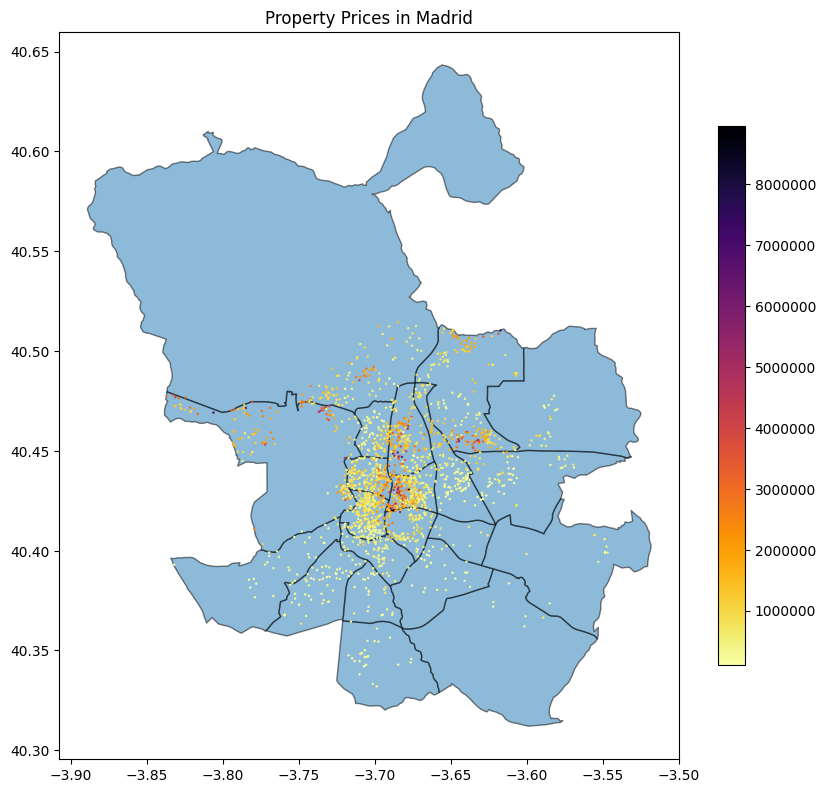

In [342]:
fig1, ax = plt.subplots(figsize=(10, 10))
madrid_map.plot(ax=ax, alpha=0.5, edgecolor='k')
gdf_madrid2.plot(ax=ax, column='price', cmap='inferno_r', markersize=0.5, legend=False)
ax.set_title('Property Prices in Madrid')

# Create a ScalarMappable object
sm = plt.cm.ScalarMappable(cmap='inferno_r', norm=plt.Normalize(vmin=gdf_madrid2['price'].min(), vmax=gdf_madrid2['price'].max()))
sm._A = []

# Add the colorbar with non-scientific notation
cbar = fig1.colorbar(sm, ax=ax, shrink=0.7)
# Set the tick labels on the colorbar to non-scientific notation
cbar.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x:.0f}"))


fig1

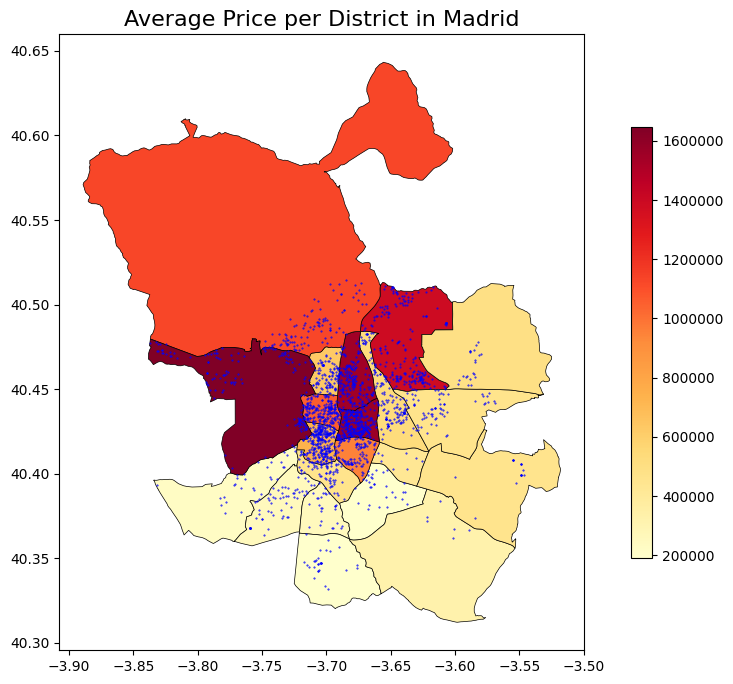

In [336]:

# Create a new figure
fig1a, ax = plt.subplots(figsize=(12,8))

# Plot the heatmap
madrid_map.plot(column='avg_price_by_polygon', cmap='YlOrRd', ax=ax, alpha=1, edgecolor='k', linewidth=0.5, legend=False)

# Add a title
ax.set_title('Average Price per District in Madrid', fontsize=16)

# Add the property dots to the map
gdf_madrid.plot(ax=ax, marker='o', color='blue', markersize=0.2)

# Create a ScalarMappable object
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=madrid_map['avg_price_by_polygon'].min(), vmax=madrid_map['avg_price_by_polygon'].max()))
sm._A = []

# Add the colorbar with non-scientific notation
cbar = fig1a.colorbar(sm, ax=ax, shrink=0.7)
# Set the tick labels on the colorbar to non-scientific notation
cbar.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x:.0f}"))

fig1a



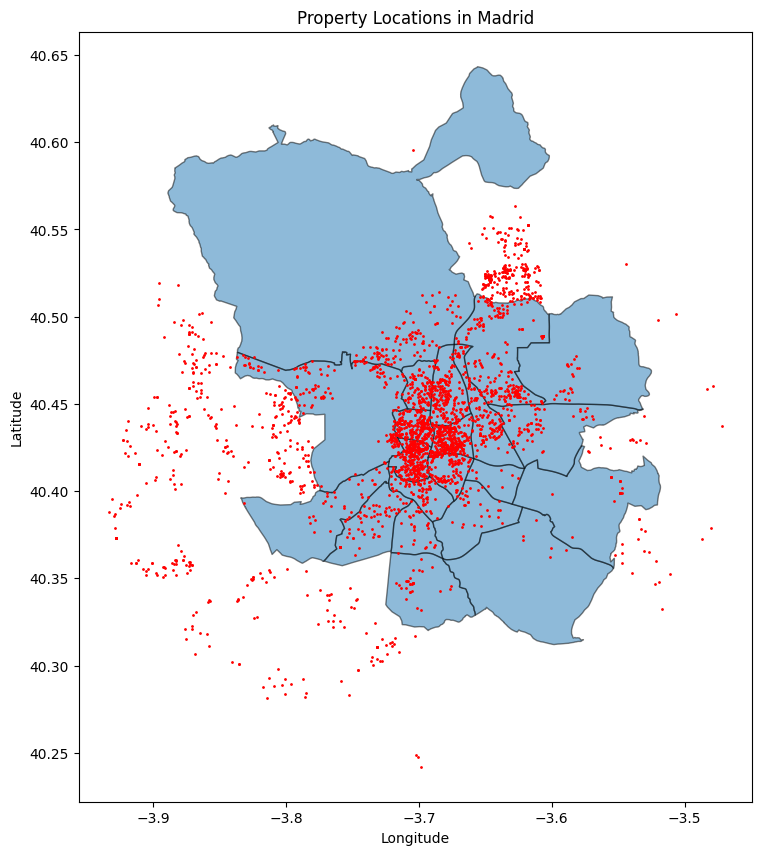

In [199]:
fig2, ax = plt.subplots(figsize=(10,10))
madrid_map.plot(ax=ax, alpha=0.5, edgecolor='black', linewidth=1)
gdf_madrid_properties.plot(ax=ax, color='red', markersize=1, )
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Property Locations in Madrid')
fig2

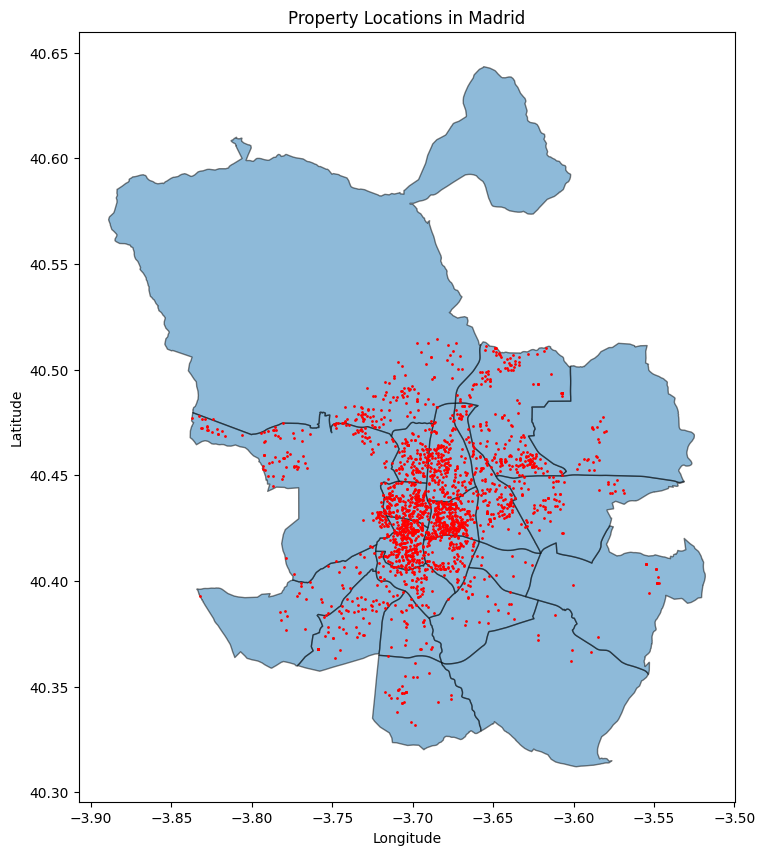

In [201]:
# USE THIS CODE to display only properties within the city of Madrid boundaries, and the above for those outside the official city boundaries as well. So gdf_madrid for this, and gdf_madrid_properties for the above.
fig2a, ax = plt.subplots(figsize=(10,10))
madrid_map.plot(ax=ax, alpha=0.5, edgecolor='black', linewidth=1)
gdf_madrid.plot(ax=ax, color='red', markersize=1, )
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Property Locations in Madrid')
fig2a

/home/winterolller/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3382: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.


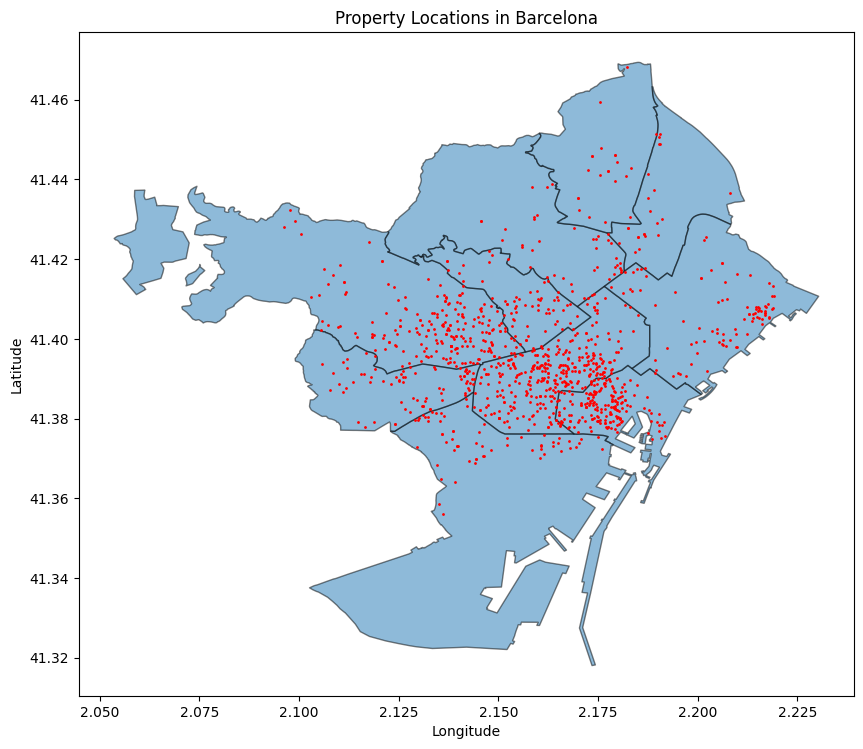

In [51]:
gdf_locs = gpd.GeoDataFrame(df_barca_clean, geometry=gpd.points_from_xy(df_barca_clean.longitude, df_barca_clean.latitude))
gdf_geometry = gdf_locs['geometry']
gdf_geometry.crs = CRS.from_epsg(25830)
gdf_city_properties = gdf_geometry.to_frame()
barca_map.crs = CRS.from_epsg(25830)
    # Transform to EPSG 25830

city_map = barca_map.to_crs(epsg=25830)
gdf_joined_map = gpd.sjoin(gdf_city_properties, city_map, op='intersects')
fig3, ax = plt.subplots(figsize=(10, 10))
city_map.plot(ax=ax, alpha=0.5, edgecolor='black', linewidth=1)
gdf_joined_map.plot(ax=ax, color='red', markersize=1)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Property Locations in Barcelona')

fig3


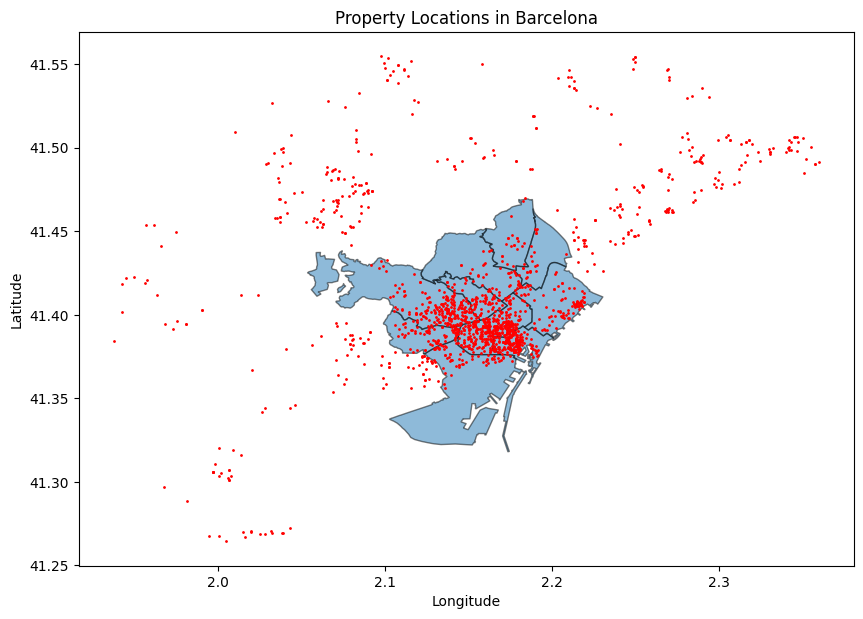

In [53]:
gdf_locs = gpd.GeoDataFrame(df_barca_clean, geometry=gpd.points_from_xy(df_barca_clean.longitude, df_barca_clean.latitude))
gdf_geometry = gdf_locs['geometry']
gdf_geometry.crs = CRS.from_epsg(25830)
gdf_city_properties = gdf_geometry.to_frame()
barca_map.crs = CRS.from_epsg(25830)
    # Transform to EPSG 25830
city_map = barca_map.to_crs(epsg=25830)
fig4, ax = plt.subplots(figsize=(10, 10))
city_map.plot(ax=ax, alpha=0.5, edgecolor='black', linewidth=1)
gdf_city_properties.plot(ax=ax, color='red', markersize=1)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Property Locations in Barcelona')

fig4

